## Imports

In [1]:
import numpy as np
import os
from dotenv import load_dotenv

from PIL import Image as PillowImage  # type: ignore
import cv2
from skimage import io as skimage_io
from tinylang.images import Image
from tinylang.messages import UserMessage
from tinylang.memory import ConversationMemory
from tinylang.llms import OpenAI
from matplotlib import pyplot as plt

_ = load_dotenv()

### Loading a sample image to be passed into the model

In [2]:
pillow_image = PillowImage.open("image.png")
pillow_image

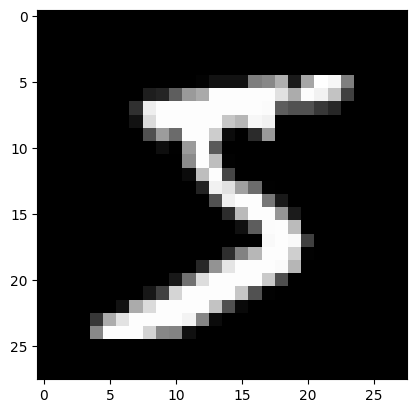

In [3]:
np_image = np.array(pillow_image)
plt.imshow(np_image, cmap="gray");

#### Different formats are also supported

In [4]:
cv2_image = cv2.imread("image.png")
skimage_image = skimage_io.imread("image.png")
bytes_image = open("image.png", "rb").read()

### Pass in the image to a UserMessage

##### Use the from_x method to create an Image object

In [5]:
user_image = Image.from_numpy(np_image)
user_image = Image.from_pillow(pillow_image)
user_image = Image.from_opencv(cv2_image)
user_image = Image.from_bytes(bytes_image)

In [6]:
UserMessage(content="Hello I have this image", image=user_image)

{'role': 'user', 'content': [{'type': 'text', 'text': 'Hello I have this image'}, {'type': 'image_url', 'image_url': ''}]}

## Use with OpenAI 

In [7]:
memory = ConversationMemory()

memory.add_user_message("Hello how are you?")
memory.add_assistant_message("I am good thanks")
memory.add_message(UserMessage(content="What is this?", image=user_image))

In [8]:
memory.format_messages()

[{'role': 'user', 'content': [{'type': 'text', 'text': 'Hello how are you?'}]},
 {'role': 'assistant',
  'content': [{'type': 'text', 'text': 'I am good thanks'}]},
 {'role': 'user',
  'content': [{'type': 'text', 'text': 'What is this?'},
   {'type': 'image_url',
    'image_url': ''}]}]

In [9]:
openai_api_key = os.environ["OPENAI_API_KEY"]
openai_organization = os.environ["OPENAI_ORGANIZATION"]

In [12]:
chatGPT = OpenAI(
    model="gpt-4-vision-preview", openai_organization=openai_organization, openai_api_key=openai_api_key, memory=memory
)
chatGPT.chat("What is this, I have downloaded this from MNIST?", image=user_image)

"You've mentioned that this is from the MNIST dataset, which is a large"